In [ ]:
import pandas as pd
import numpy as np

Collab notebook

In [ ]:
#!unzip "/content/drive/MyDrive/Dog vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog vision/"

# End to end multi-class Dog breed Classification
Using multi-class image classifier with TensorFlow & TensorFlow Hub

## 1. Problem

  Identifying the breed of a dog provided their image

## 2. Data

  Data I'm using is from Kaggle dog breed identification competition

## 3. Evaluation
  https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
  Dealing with images (Unstructured data) so it's probably best we use transfer learning
  There exists 120 dog breeds so it's a multi-class classification problem
  There exists 10k images in both training & test sets, training has labels while test doesn't

## Setting up workspace

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("Version", tf.__version__)
print("Version", hub.__version__)

# Check GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

Version 2.8.2
Version 0.12.0
GPU available


In [ ]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog vision/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

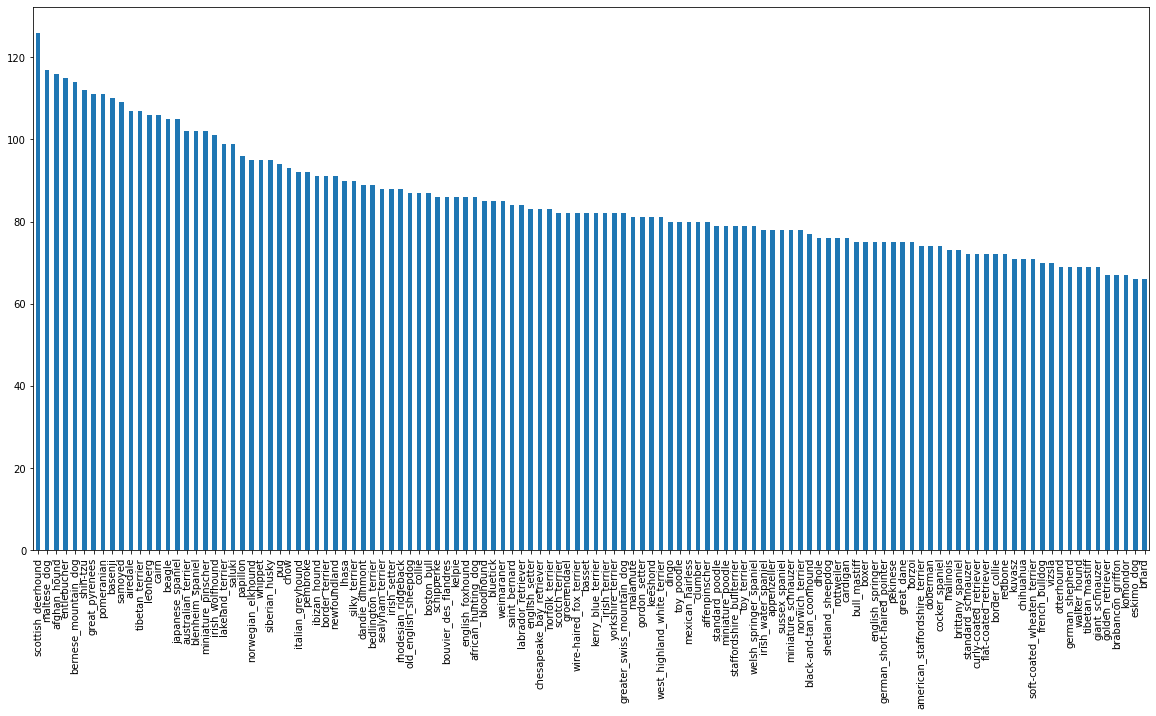

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

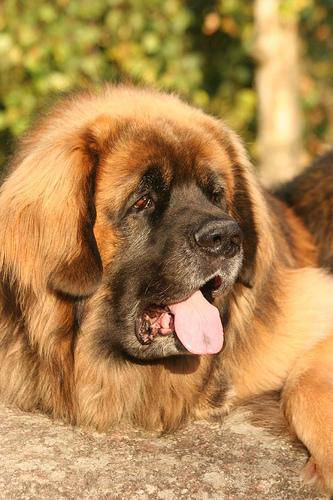

In [ ]:
#Viewing an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog vision/test/004bf14426d1a830d459a9e0c0721309.jpg")

In [ ]:
#Creating pathnames for Image IDs
filenames = ["/content/drive/MyDrive/Dog vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

len(filenames), filenames

(10222,
 ['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
  '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
  '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
  '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
  '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
  '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
  '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
  '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
  '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
  '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
  '/content/drive/MyDrive/Dog vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
  '/content/drive/MyDrive/Dog vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
  '/cont

In [ ]:
 import os
 if len(os.listdir("/content/drive/MyDrive/Dog vision/train/")) == len(filenames):
   print("Lenght matches")

Lenght matches


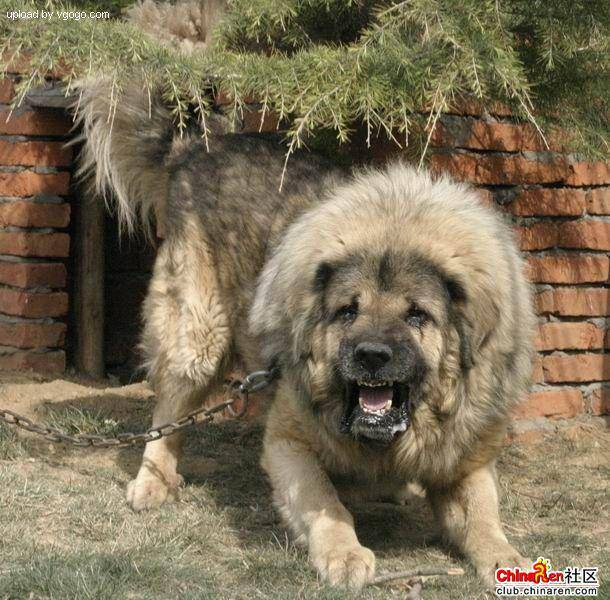

In [ ]:
Image(filenames[9000])

In [ ]:
import numpy as np
labels = labels_csv["breed"]
#labels = np.array(labels)
labels, len(labels)

(0                     boston_bull
 1                           dingo
 2                        pekinese
 3                        bluetick
 4                golden_retriever
                    ...           
 10217                      borzoi
 10218              dandie_dinmont
 10219                    airedale
 10220          miniature_pinscher
 10221    chesapeake_bay_retriever
 Name: breed, Length: 10222, dtype: object, 10222)

In [ ]:
len(filenames)

10222

In [ ]:
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [ ]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
bool_labels = [ label == unique_breeds for label in labels]
bool_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(bool_labels)

10222

In [ ]:
print(labels[0])
print(bool_labels[0].argmax())
print(bool_labels[0].astype(int))

boston_bull
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# **Creating validation set**

In [ ]:
X  = filenames
y = bool_labels

In [ ]:
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

#Split into training & validation
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## preprocessing images (Turning images into Tensors)

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max()

255

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [ ]:
#Set the image size
IMG_SIZE = 224

#Function for preprocsessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes the image paths & turns them into tensors
  """

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  #convert the color channel values from 9-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize image size
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


## Turning data into minibatches

In [ ]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  This function creates batches of images X & labels y
  """
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches..
Creating validation data batches..


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches


In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())

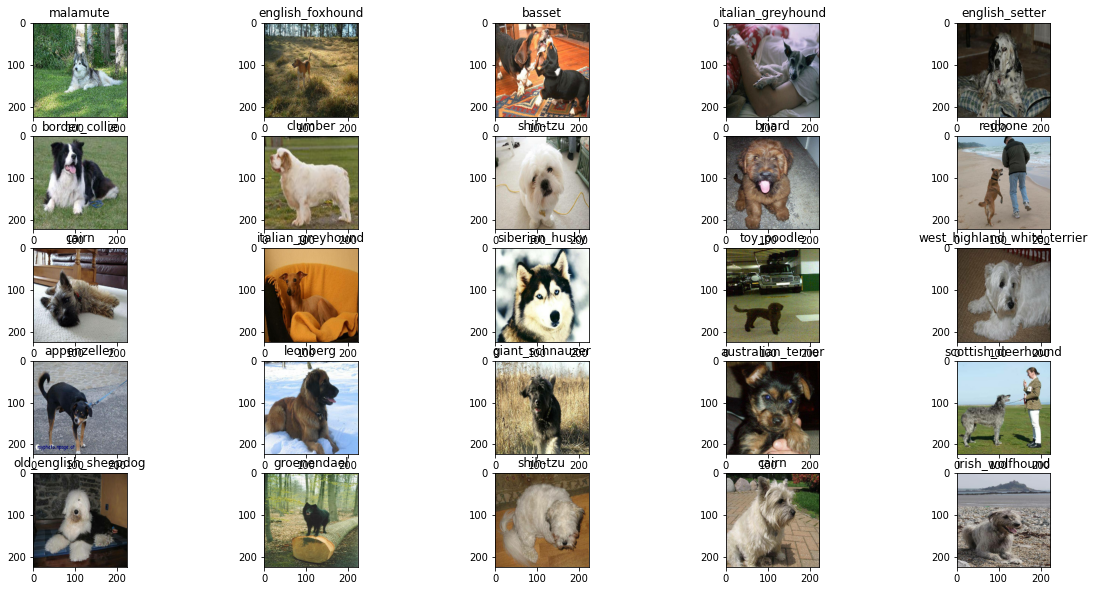

In [ ]:
show_25_images(train_images, train_labels)

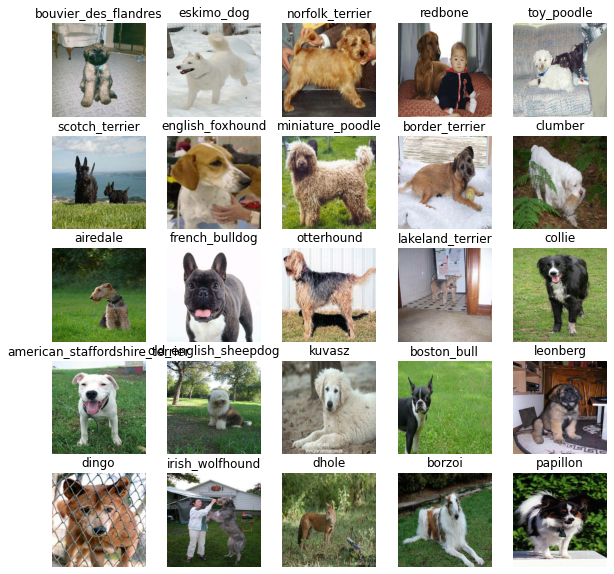

In [ ]:
show_25_images(train_images, train_labels)

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())

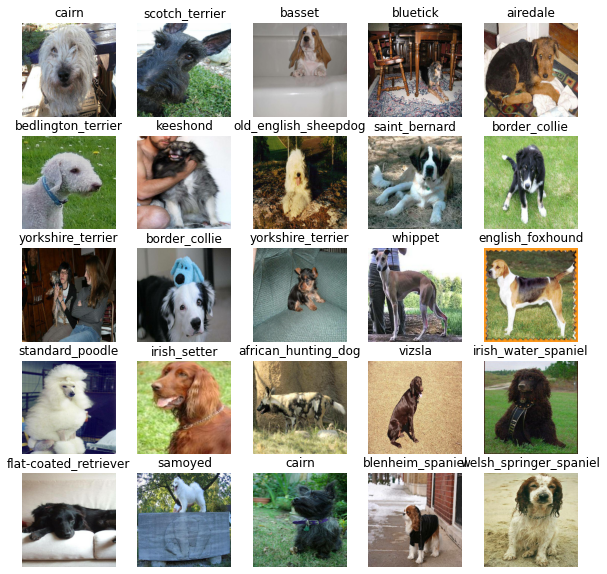

In [ ]:
show_25_images(val_images, val_labels)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



## Create function which builds a keras model


In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_URL=MODEL_URL):
  print("Building model with:", MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                               activation="softmax")
      ])
  
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Callbacks

In [ ]:
%load_ext tensorboard

In [ ]:

import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
#Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
print("GPU Avail" if tf.config.list_physical_devices("GPU") else "no")

GPU Avail


In [ ]:
def train_model():

  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 377s 15s/step - loss: 4.5582 - accuracy: 0.1013 - val_loss: 3.4284 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 3s 116ms/step - loss: 1.6000 - accuracy: 0.6900 - val_loss: 2.1662 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 3s 117ms/step - loss: 0.5478 - accuracy: 0.9413 - val_loss: 1.6562 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 3s 120ms/step - loss: 0.2433 - accuracy: 0.9900 - val_loss: 1.4889 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 3s 124ms/step - loss: 0.1435 - accuracy: 0.9962 - val_loss: 1.4180 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 3s 120ms/step - loss: 0.0985 - accuracy: 1.0000 - val_loss: 1.3734 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================

In [ ]:
%tensorboard  --logdir /content/drive/MyDrive/Dog\ Vision/logs


<IPython.core.display.Javascript object>

In [ ]:
predictions = model.predict(val_data, verbose=2)

7/7 - 22s - 22s/epoch - 3s/step


In [ ]:
predictions.shape

(200, 120)

In [ ]:
predictions[0]

array([1.0022756e-03, 6.1663485e-04, 7.6207635e-03, 9.8977201e-03,
       6.3733547e-03, 1.6177297e-02, 3.9996123e-03, 1.1747188e-02,
       6.4377505e-03, 1.7373350e-03, 3.0743000e-03, 2.1514597e-03,
       6.0142757e-04, 2.9517949e-02, 4.0834229e-03, 7.6532061e-04,
       1.6863801e-03, 1.3468069e-03, 1.6060789e-04, 2.4092630e-03,
       1.0790805e-03, 4.7612465e-03, 4.1028801e-03, 5.5153109e-03,
       1.0177950e-02, 8.7210648e-03, 7.9940388e-04, 3.6605381e-04,
       1.9161182e-03, 8.7163989e-03, 7.1243960e-03, 1.7077393e-03,
       1.5253224e-03, 8.2988217e-03, 8.2641072e-04, 4.4644936e-03,
       5.6012976e-03, 6.4618897e-04, 1.7475620e-03, 2.3876363e-03,
       8.3484510e-03, 1.7988097e-03, 7.3654228e-04, 2.3667425e-01,
       1.8881754e-03, 8.2931388e-03, 2.1801846e-02, 6.8168866e-04,
       2.0241397e-03, 5.1220506e-03, 3.3773793e-04, 1.3828613e-02,
       1.8860121e-03, 2.7662094e-04, 1.0624765e-03, 6.4008324e-03,
       6.1311712e-04, 4.5266986e-04, 2.0207653e-03, 2.3411955e

In [ ]:
np.sum(predictions[1])

1.0

In [ ]:


# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")



[0.0145502  0.04673981 0.00419318 0.00183698 0.00425257 0.00090022
 0.00218631 0.00412666 0.00478303 0.00066201 0.00686238 0.03128112
 0.0022107  0.00196533 0.00765887 0.00180423 0.02951078 0.00441619
 0.01618884 0.00182963 0.003514   0.0022632  0.00723587 0.00980764
 0.00274077 0.01482781 0.0274267  0.00387779 0.00452158 0.00131011
 0.01303097 0.00330767 0.00865042 0.00057728 0.00517433 0.01506483
 0.03225627 0.00294133 0.00311274 0.00331766 0.0021652  0.00066649
 0.00722688 0.00310474 0.00491469 0.00682071 0.00099095 0.00408419
 0.0109595  0.00270244 0.00680495 0.00408459 0.00705622 0.0131644
 0.00457602 0.00917463 0.00863265 0.01650122 0.00094183 0.01154017
 0.00326452 0.01292033 0.00024856 0.00214533 0.00420615 0.01983773
 0.03345604 0.00078696 0.00704956 0.00068709 0.00817201 0.00107715
 0.00437536 0.00261763 0.01519333 0.00795644 0.00170093 0.00278126
 0.00068415 0.00118828 0.00576766 0.00704741 0.02059783 0.0061037
 0.00606229 0.01246943 0.00134821 0.00147098 0.00203209 0.015556

In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label


'sussex_spaniel'

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:


# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.1f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

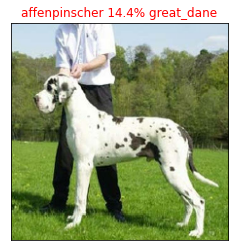

In [ ]:
plot_pred(prediction_probabilities= predictions, labels=val_labels, images=val_images, n=99)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

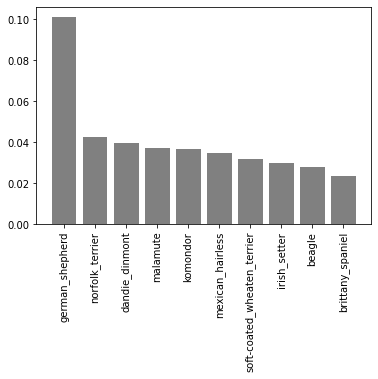

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=56)

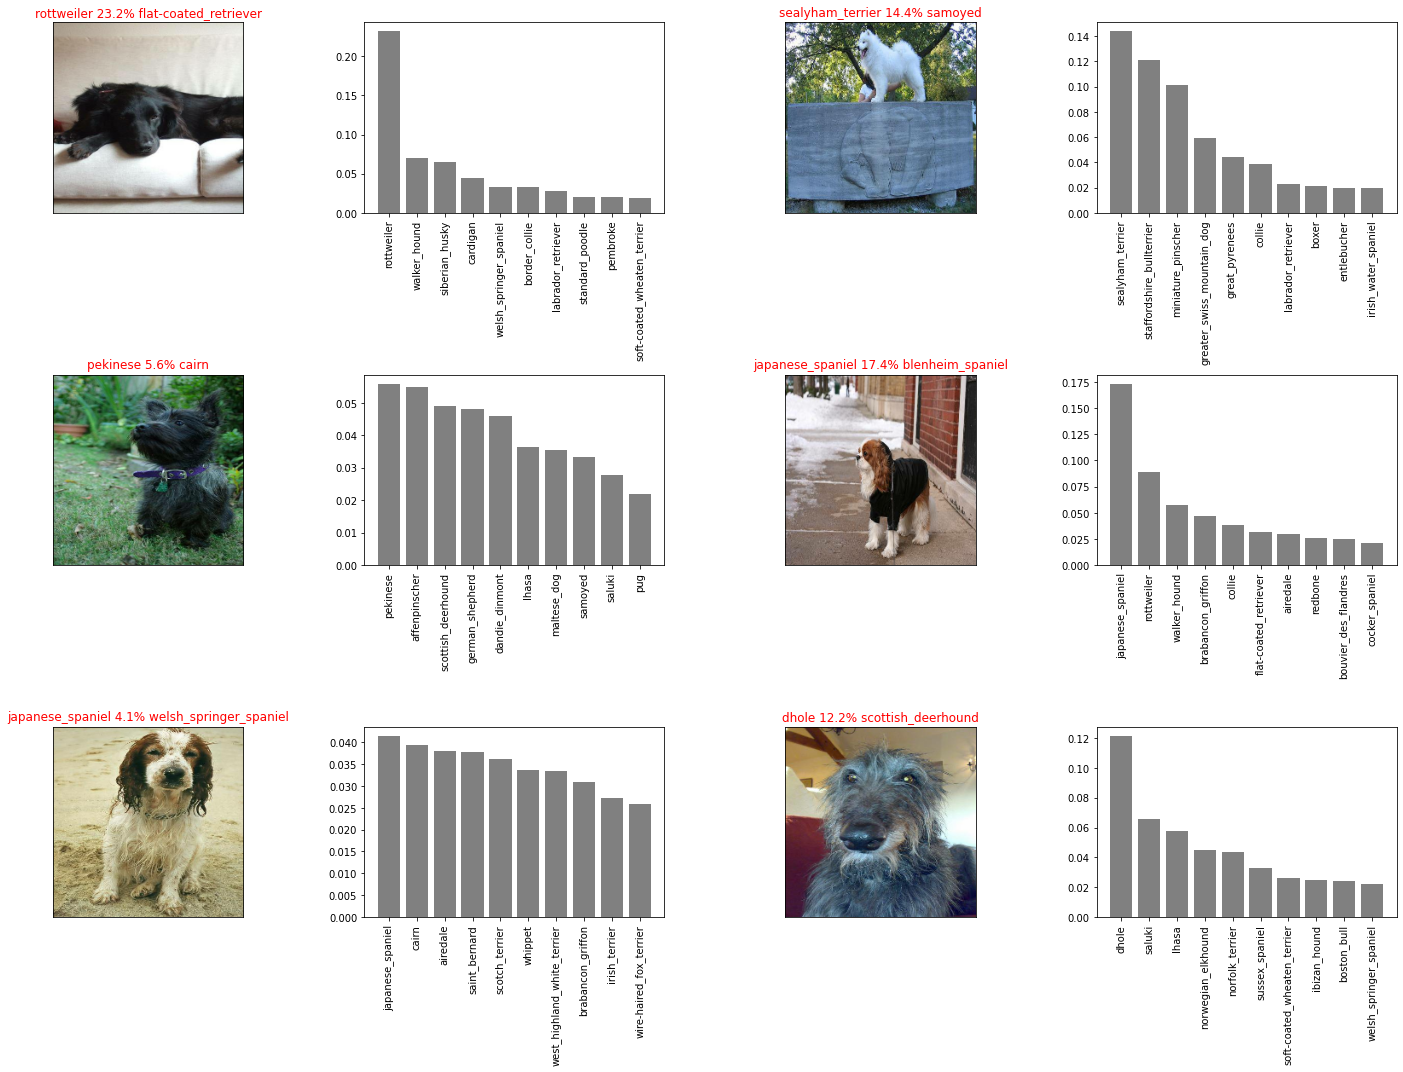

In [ ]:
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20220903-16071662221236-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20220903-16071662221236-1000-images-mobilenetv2-Adam.h5'

In [ ]:
loaded_model = load_model("drive/My Drive/Dog Vision/models/20220903-16071662221236-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20220903-16071662221236-1000-images-mobilenetv2-Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 79ms/step - loss: 1.2862 - accuracy: 0.6500


[1.2862141132354736, 0.6499999761581421]

In [ ]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 2s 141ms/step - loss: 1.2862 - accuracy: 0.6500


[1.2862141132354736, 0.6499999761581421]

## Training the full dataset dog model

In [ ]:
X_train[:10]

['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/content/drive/MyDrive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/content/drive/MyDrive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/content/drive/MyDrive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/content/drive/MyDrive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 '/content/drive/MyDrive/Dog vision/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 '/content/drive/MyDrive/Dog vision/train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
 '/content/drive/MyDrive/Dog vision/train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
 '/content/drive/MyDrive/Dog vision/train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
 '/content/drive/MyDrive/Dog vision/train/143b9484273e57668d03bfc26755810a.jpg']

In [ ]:
X

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Dog vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/content/drive/MyDrive/Dog vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '/content/drive/MyDrive/Dog

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches..


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
#Fit the full model

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1184s 4s/step - loss: 1.3504 - accuracy: 0.6733
Epoch 2/100
320/320 [==============================] - 35s 108ms/step - loss: 0.4084 - accuracy: 0.8811
Epoch 3/100
320/320 [==============================] - 35s 111ms/step - loss: 0.2415 - accuracy: 0.9337
Epoch 4/100
320/320 [==============================] - 36s 112ms/step - loss: 0.1549 - accuracy: 0.9632
Epoch 5/100
320/320 [==============================] - 36s 112ms/step - loss: 0.1072 - accuracy: 0.9777
Epoch 6/100
320/320 [==============================] - 37s 115ms/step - loss: 0.0754 - accuracy: 0.9872
Epoch 7/100
320/320 [==============================] - 36s 113ms/step - loss: 0.0579 - accuracy: 0.9926
Epoch 8/100
320/320 [==============================] - 36s 114ms/step - loss: 0.0473 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 38s 117ms/step - loss: 0.0375 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 38s 118ms

In [ ]:
save_model(model, suffix="full-images-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20220905-12281662380913-full-images-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20220905-12281662380913-full-images-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('/content/drive/MyDrive/Dog Vision/models/20220905-12281662380913-full-images-set-mobilenetv2-Adam.h5')


Loading saved model from: /content/drive/MyDrive/Dog Vision/models/20220905-12281662380913-full-images-set-mobilenetv2-Adam.h5


In [ ]:
test_path = "/content/drive/MyDrive/Dog vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog vision/test/e66e1f3be08028cc17ea788657e014fa.jpg',
 '/content/drive/MyDrive/Dog vision/test/e302e1c88252f91357e62b8fd340f2d1.jpg',
 '/content/drive/MyDrive/Dog vision/test/e49bfa1dc9bc6fa7464b29507725b3af.jpg',
 '/content/drive/MyDrive/Dog vision/test/e17defebd1b8fc39e9c3c10df3c2e3de.jpg',
 '/content/drive/MyDrive/Dog vision/test/def639bab46dfc714234180be730ef49.jpg',
 '/content/drive/MyDrive/Dog vision/test/def88eeacc633cbc3d46d5f5fb495379.jpg',
 '/content/drive/MyDrive/Dog vision/test/e0e3eb01e80b1d694a47b23909e158ec.jpg',
 '/content/drive/MyDrive/Dog vision/test/e0e47873420b2ed420e920a74c663233.jpg',
 '/content/drive/MyDrive/Dog vision/test/e193c532dc7c9a5ee397848a1ee007f0.jpg',
 '/content/drive/MyDrive/Dog vision/test/e51de127ddf2c492372a63f0644b1a58.jpg']

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches..


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
len(test_filenames)

10357

In [ ]:
#Make predictions on full data batch
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 175s 529ms/step


In [ ]:
test_predictions[:10]

array([[0.0623169 , 0.02079787, 0.00546276, ..., 0.00443716, 0.00590909,
        0.00286727],
       [0.00340851, 0.00361326, 0.00665303, ..., 0.01449225, 0.02738693,
        0.00612671],
       [0.00136674, 0.00148411, 0.00710668, ..., 0.00166043, 0.00077588,
        0.00233005],
       ...,
       [0.0025565 , 0.01386817, 0.00049671, ..., 0.00794544, 0.00577227,
        0.00089342],
       [0.01190843, 0.00404681, 0.0014615 , ..., 0.00340051, 0.00259737,
        0.0002301 ],
       [0.00597997, 0.00064028, 0.00247588, ..., 0.00275392, 0.00177249,
        0.0009226 ]], dtype=float32)

In [ ]:
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[0.0623169 , 0.02079787, 0.00546276, ..., 0.00443716, 0.00590909,
        0.00286727],
       [0.00340851, 0.00361326, 0.00665303, ..., 0.01449225, 0.02738693,
        0.00612671],
       [0.00136674, 0.00148411, 0.00710668, ..., 0.00166043, 0.00077588,
        0.00233005],
       ...,
       [0.0025565 , 0.01386817, 0.00049671, ..., 0.00794544, 0.00577227,
        0.00089342],
       [0.01190843, 0.00404681, 0.0014615 , ..., 0.00340051, 0.00259737,
        0.0002301 ],
       [0.00597997, 0.00064028, 0.00247588, ..., 0.00275392, 0.00177249,
        0.0009226 ]])

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
## preparing test dataset predictions for kaggle
#https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

In [ ]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_filenames[:3]

['/content/drive/MyDrive/Dog vision/test/e66e1f3be08028cc17ea788657e014fa.jpg',
 '/content/drive/MyDrive/Dog vision/test/e302e1c88252f91357e62b8fd340f2d1.jpg',
 '/content/drive/MyDrive/Dog vision/test/e49bfa1dc9bc6fa7464b29507725b3af.jpg']

In [ ]:
test_ids =[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['e66e1f3be08028cc17ea788657e014fa',
 'e302e1c88252f91357e62b8fd340f2d1',
 'e49bfa1dc9bc6fa7464b29507725b3af',
 'e17defebd1b8fc39e9c3c10df3c2e3de',
 'def639bab46dfc714234180be730ef49',
 'def88eeacc633cbc3d46d5f5fb495379',
 'e0e3eb01e80b1d694a47b23909e158ec',
 'e0e47873420b2ed420e920a74c663233',
 'e193c532dc7c9a5ee397848a1ee007f0',
 'e51de127ddf2c492372a63f0644b1a58',
 'e190bfb63cf9a7cf1b3ae2ea654a735b',
 'eceb457b878bc73e565b0efa002d5563',
 'eb641b6721c3d967b8e92313c943eba9',
 'e982fc6397c1f837100f28a8ed26d86e',
 'ea5ae600ca3996528b6548eceac767cf',
 'ecf3d6520cec171b81830fb38fce1570',
 'f5a6e430c2c363335d22ae0593d7533a',
 'e86bb44f11c953a6d69c548e756f5a3b',
 'eedc3590c9569109aeb179ae3dc90300',
 'f3cbc8bcd54963296f75377d6fe931d3',
 'eef2fd5db98424ae214e176a910e9e3b',
 'e85b19a69be67eaef9fe58b7e689ee81',
 'f2e4e4f1ab9d156443682dc4653f23e5',
 'f2081ded3fa95eb118ff88b7eaad992e',
 'f14c06e952a3d1d4e6a5b1c9e1384926',
 'e8f51d54d179b05ea4cc9c726cae9229',
 'f569c5b12fae4ca37d376d21bc05f2b3',
 

In [ ]:
preds_df["id"] = test_ids
preds_df.head()

id affenpinscher afghan_hound  \
0  e66e1f3be08028cc17ea788657e014fa           NaN          NaN   
1  e302e1c88252f91357e62b8fd340f2d1           NaN          NaN   
2  e49bfa1dc9bc6fa7464b29507725b3af           NaN          NaN   
3  e17defebd1b8fc39e9c3c10df3c2e3de           NaN          NaN   
4  def639bab46dfc714234180be730ef49           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
#Add the prediction probs to each dog breed
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e66e1f3be08028cc17ea788657e014fa       0.062317      0.020798   
1  e302e1c88252f91357e62b8fd340f2d1       0.003409      0.003613   
2  e49bfa1dc9bc6fa7464b29507725b3af       0.001367      0.001484   
3  e17defebd1b8fc39e9c3c10df3c2e3de       0.005018      0.012211   
4  def639bab46dfc714234180be730ef49       0.001374      0.004019   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.005463  0.000215                        0.000431     0.001398   
1             0.006653  0.021980                        0.018007     0.012786   
2             0.007107  0.014535                        0.001054     0.000457   
3             0.006869  0.002935                        0.006970     0.016988   
4             0.002124  0.008238                        0.002768     0.002301   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.007379  0.004313  0.002342  ...    0.020802     0.003817   
1            0.003927  0.034720  0.038273  ...    0.001115     0.018502   
2            0.001686  0.001299  0.005191  ...    0.001998     0.002248   
3            0.045443  0.020713  0.012806  ...    0.003430     0.014643   
4            0.002229  0.010646  0.006630  ...    0.013480     0.015401   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.001092      0.001860    0.002488                0.007826   
1  0.006604      0.005240    0.001841                0.002415   
2  0.014005      0.027598    0.010404                0.002485   
3  0.001426      0.013378    0.015041                0.002567   
4  0.001531      0.002395    0.004804                0.004593   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.003304  0.004437                 0.005909   
1                     0.003741  0.014492                 0.027387   
2                     0.002588  0.001660                 0.000776   
3                     0.000494  0.012704                 0.003293   
4                     0.004526  0.065993                 0.002722   

   yorkshire_terrier  
0           0.002867  
1           0.006127  
2           0.002330  
3           0.001019  
4           0.013340  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

In [ ]:
custom_path = "/content/drive/MyDrive/Dog Vision/custom images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]


In [ ]:
custom_image_paths

['/content/drive/MyDrive/Dog Vision/custom images/dog2.jpg',
 '/content/drive/MyDrive/Dog Vision/custom images/dog1.jpg',
 '/content/drive/MyDrive/Dog Vision/custom images/dog3.jpeg']

In [ ]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches..


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds

array([[1.76099187e-03, 4.62935248e-04, 3.56658339e-03, 6.26798905e-03,
        3.80125735e-03, 7.49363238e-03, 2.86769075e-03, 3.41557786e-02,
        3.55115929e-03, 4.40661737e-04, 4.40139265e-04, 5.72930556e-04,
        5.30362613e-02, 2.23360490e-03, 1.35715294e-04, 5.86082181e-03,
        4.06638603e-04, 1.19190814e-03, 4.88359423e-04, 8.32097884e-03,
        8.52805912e-04, 3.19108926e-02, 1.32236322e-02, 3.25847679e-04,
        4.84808302e-03, 7.41201174e-03, 2.97093182e-03, 3.91766941e-03,
        3.48849199e-03, 1.26785142e-02, 2.26030592e-03, 1.82369146e-02,
        1.96407899e-01, 2.22899001e-02, 2.64743110e-03, 4.87844609e-02,
        1.05588906e-03, 2.15283991e-03, 3.59843572e-04, 5.27636439e-04,
        8.81598738e-04, 8.30845849e-04, 8.70663393e-03, 5.43542206e-04,
        3.61465296e-04, 1.18738133e-03, 1.48262596e-02, 5.61453169e-04,
        1.22947895e-04, 1.10165868e-02, 5.00148453e-04, 1.20361811e-02,
        6.51276670e-03, 4.39345604e-03, 6.29014859e-04, 1.300311

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['cocker_spaniel', 'miniature_poodle', 'redbone']

In [ ]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

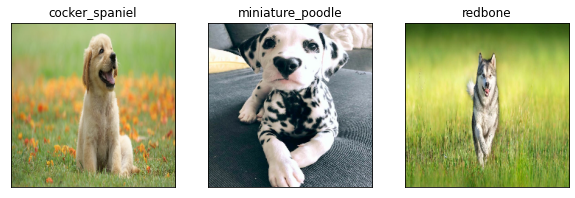

In [ ]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)